In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')

In [3]:
df.columns =['KOUS']
df['KOUS'].replace('.', '', inplace =True)
df['KOUS'] = pd.to_numeric(df['KOUS'])
df['KOUS'].fillna(method = 'ffill', inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1306 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [6]:
df = df[(df.index>'2019-01-01') & (df.index < '2020-01-01')]

# ARIMA(p,k,q) => k 결정

In [7]:
adfuller(df.KOUS)

(-1.834289925068011,
 0.36357542996557135,
 2,
 257,
 {'1%': -3.4560535712549925,
  '10%': -2.5727985212493754,
  '5%': -2.8728527662442334},
 1453.3457437081727)

p-valuer가가 0.36으로 귀무가설이이 기각되지 않는다 -> 안정적이지 않다 따라서 차분이 필요하다

In [8]:
adfuller(df.KOUS.diff().dropna())

(-10.572632524492832,
 7.239046680336767e-19,
 1,
 257,
 {'1%': -3.4560535712549925,
  '10%': -2.5727985212493754,
  '5%': -2.8728527662442334},
 1446.168602565303)

K = 1로 (1차 차분이 안정적이다)

# ARIMA(p,k,q) => p, q 결정

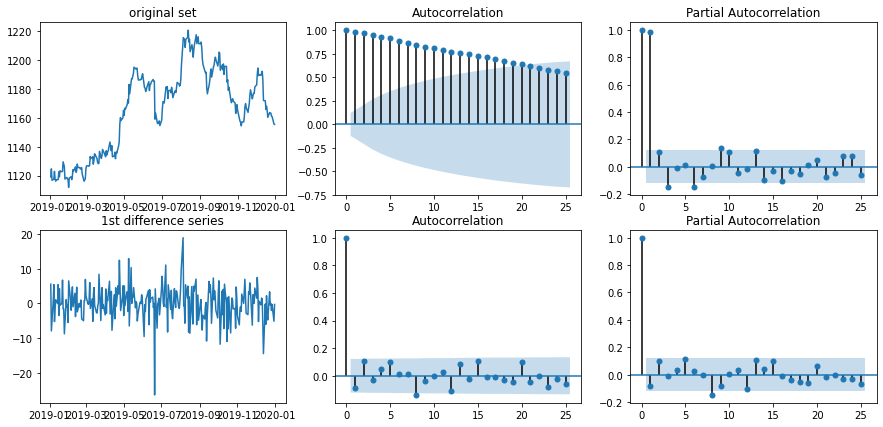

In [18]:
figure, axes =plt.subplots(2, 3, figsize =(15,7))
axes[0,0].plot(df.KOUS)
axes[0,0].set_title('original set')
axes[1,0].plot(df.KOUS.diff())
axes[1,0].set_title('1st difference series')
plot_acf(df.KOUS, axes[0,1])
plot_pacf(df.KOUS, axes[0,2])
plot_acf(df.KOUS.diff().dropna(), axes[1,1])
plot_pacf(df.KOUS.diff().dropna(), axes[1,2])
plt.show()

# ARIMA 예측 모델링
